In [1]:
"""
File: train_emotion_classifier.py
Author: Octavio Arriaga
Email: arriaga.camargo@gmail.com
Github: https://github.com/oarriaga
Description: Train emotion classification model
"""

'\nFile: train_emotion_classifier.py\nAuthor: Octavio Arriaga\nEmail: arriaga.camargo@gmail.com\nGithub: https://github.com/oarriaga\nDescription: Train emotion classification model\n'

In [2]:
# !pip3 install Pillow==2.6.0

In [1]:
from keras.callbacks import CSVLogger, ModelCheckpoint, EarlyStopping
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator

from cnn import mini_XCEPTION
from utils.datasets import DataManager
from utils.datasets import split_data
from utils.preprocessor import preprocess_input
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [4]:
import tensorflow as tf
from keras import backend
backend.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0']

In [5]:
# parameters
batch_size = 32
num_epochs = 10000
input_shape = (64, 64, 1)
validation_split = .2
verbose = 1
num_classes = 7
patience = 50
base_path = '/data/emotion_models/'

In [6]:
# data generator

# model parameters/compilation
model = mini_XCEPTION(input_shape, num_classes)
model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 64, 64, 1)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 62, 62, 8)    72          input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 62, 62, 8)    32          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 62, 62, 8)    0           batch_normalization_1[0][0]      
_____________________________________

In [7]:
dataset_name = 'fer2013'

In [8]:
log_file_path = base_path + dataset_name + '_emotion_training.log'
csv_logger = CSVLogger(log_file_path, append=False)
early_stop = EarlyStopping('val_loss', patience=patience)
reduce_lr = ReduceLROnPlateau('val_loss', factor=0.1,
                              patience=int(patience/4), verbose=1)
trained_models_path = base_path + dataset_name + '_mini_XCEPTION'
model_names = trained_models_path + '.{epoch:02d}-{val_acc:.2f}.hdf5'
model_checkpoint = ModelCheckpoint(model_names, 'val_loss', verbose=1,
                                                save_best_only=True)
callbacks = [model_checkpoint, csv_logger, early_stop, reduce_lr]

In [7]:
# train_data_dir = "/root/finalproject/tensorflow-for-poets-2/tf_files/Training"

In [9]:
train_data_dir = "/data/Training"

In [10]:
IM_WIDTH, IM_HEIGHT = 64, 64 #fixed size for InceptionV3
NB_EPOCHS = 10000
BAT_SIZE = 32
FC_SIZE = 1024
NB_IV3_LAYERS_TO_FREEZE = 172



In [11]:

data_generator = ImageDataGenerator(
                        preprocessing_function=preprocess_input,
                        featurewise_center=False,
                        featurewise_std_normalization=False,
                        rotation_range=10,
                        width_shift_range=0.1,
                        height_shift_range=0.1,
                        zoom_range=.1,
                        horizontal_flip=True,
                        validation_split=0.2)
    
train_generator = data_generator.flow_from_directory(
train_data_dir,
target_size=(IM_WIDTH, IM_HEIGHT),
batch_size=BAT_SIZE,
subset='training',
color_mode="grayscale")

validation_generator = data_generator.flow_from_directory(
    train_data_dir, # same directory as training data
    target_size=(IM_WIDTH, IM_HEIGHT),
    batch_size=BAT_SIZE,
    subset='validation',
color_mode="grayscale")


Found 22968 images belonging to 7 classes.
Found 5740 images belonging to 7 classes.


(32, 64, 64, 1)
(64, 64, 1)


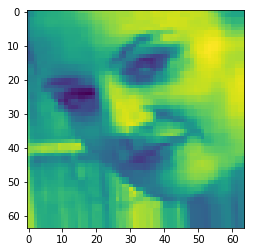

In [12]:
x,y = train_generator.next()
# for i in range(0,1):
#     image = x[i]
#     plt.imshow(image.transpose(2,1,0))
#     plt.show()
print(x.shape)
image = x[2]
print(image.shape)
plt.imshow(image.reshape(IM_WIDTH, IM_HEIGHT))
plt.show()

In [ ]:
import time
start = time. time()


model.fit_generator( 
    train_generator,
    steps_per_epoch = train_generator.samples // BAT_SIZE,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // BAT_SIZE,
    epochs=NB_EPOCHS, verbose=1, callbacks=callbacks)

end = time. time()
print(end - start)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10000
717/717 [==============================] - 54s 76ms/step - loss: 1.7965 - acc: 0.3192 - val_loss: 1.7187 - val_acc: 0.3521

Epoch 00001: val_loss improved from inf to 1.71872, saving model to /data/emotion_models/fer2013_mini_XCEPTION.01-0.35.hdf5
Epoch 2/10000
717/717 [==============================] - 42s 58ms/step - loss: 1.5443 - acc: 0.4189 - val_loss: 1.5243 - val_acc: 0.4289

Epoch 00002: val_loss improved from 1.71872 to 1.52432, saving model to /data/emotion_models/fer2013_mini_XCEPTION.02-0.43.hdf5
Epoch 3/10000
717/717 [==============================] - 42s 59ms/step - loss: 1.4447 - acc: 0.4547 - val_loss: 1.7418 - val_acc: 0.3775

Epoch 00003: val_loss did not improve from 1.52432
Epoch 4/10000
717/717 [==============================] - 43s 59ms/step - loss: 1.3654 - acc: 0.4875 - val_loss: 1.4513 - val_acc: 0.4615

Epoch 00004: val_loss improved from 1.52432 to 1.45133, saving model to /data/emotion_models/fer2

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



717/717 [==============================] - 42s 59ms/step - loss: 1.0920 - acc: 0.5907 - val_loss: 1.2494 - val_acc: 0.5247

Epoch 00018: val_loss did not improve from 1.17787
Epoch 19/10000
717/717 [==============================] - 42s 59ms/step - loss: 1.0864 - acc: 0.5936 - val_loss: 1.1928 - val_acc: 0.5478

Epoch 00019: val_loss did not improve from 1.17787
Epoch 20/10000
717/717 [==============================] - 42s 59ms/step - loss: 1.0737 - acc: 0.6013 - val_loss: 1.2082 - val_acc: 0.5538

Epoch 00020: val_loss did not improve from 1.17787
Epoch 21/10000
717/717 [==============================] - 42s 59ms/step - loss: 1.0716 - acc: 0.6007 - val_loss: 1.2373 - val_acc: 0.5420

Epoch 00021: val_loss did not improve from 1.17787
Epoch 22/10000
717/717 [==============================] - 42s 59ms/step - loss: 1.0637 - acc: 0.6048 - val_loss: 1.1292 - val_acc: 0.5718

Epoch 00022: val_loss improved from 1.17787 to 1.12920, saving model to /data/emotion_models/fer2013_mini_XCEPTION.2

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



717/717 [==============================] - 43s 60ms/step - loss: 1.0224 - acc: 0.6180 - val_loss: 1.1212 - val_acc: 0.5820

Epoch 00030: val_loss did not improve from 1.11129
Epoch 31/10000
717/717 [==============================] - 42s 59ms/step - loss: 1.0092 - acc: 0.6244 - val_loss: 1.1856 - val_acc: 0.5629

Epoch 00031: val_loss did not improve from 1.11129
Epoch 32/10000
717/717 [==============================] - 42s 59ms/step - loss: 1.0104 - acc: 0.6205 - val_loss: 1.1296 - val_acc: 0.5752

Epoch 00032: val_loss did not improve from 1.11129
Epoch 33/10000
717/717 [==============================] - 42s 59ms/step - loss: 1.0060 - acc: 0.6300 - val_loss: 1.1827 - val_acc: 0.5646

Epoch 00033: val_loss did not improve from 1.11129
Epoch 34/10000
717/717 [==============================] - 42s 59ms/step - loss: 0.9973 - acc: 0.6286 - val_loss: 1.1278 - val_acc: 0.5906

Epoch 00034: val_loss did not improve from 1.11129
Epoch 35/10000
549/717 [=====================>........] - ETA: 8s

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



717/717 [==============================] - 42s 59ms/step - loss: 0.9710 - acc: 0.6404 - val_loss: 1.1096 - val_acc: 0.5834

Epoch 00041: val_loss did not improve from 1.10204
Epoch 42/10000
717/717 [==============================] - 42s 59ms/step - loss: 0.9650 - acc: 0.6432 - val_loss: 1.1359 - val_acc: 0.5808

Epoch 00042: val_loss did not improve from 1.10204
Epoch 43/10000
717/717 [==============================] - 42s 59ms/step - loss: 0.9646 - acc: 0.6429 - val_loss: 1.1128 - val_acc: 0.5892

Epoch 00043: val_loss did not improve from 1.10204
Epoch 44/10000
717/717 [==============================] - 42s 59ms/step - loss: 0.9598 - acc: 0.6412 - val_loss: 1.1192 - val_acc: 0.5774

Epoch 00044: val_loss did not improve from 1.10204
Epoch 45/10000
717/717 [==============================] - 42s 59ms/step - loss: 0.9566 - acc: 0.6450 - val_loss: 1.0800 - val_acc: 0.6025

Epoch 00045: val_loss improved from 1.10204 to 1.07997, saving model to /data/emotion_models/fer2013_mini_XCEPTION.4

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



717/717 [==============================] - 42s 59ms/step - loss: 0.9358 - acc: 0.6519 - val_loss: 1.1129 - val_acc: 0.5913

Epoch 00052: val_loss did not improve from 1.07046
Epoch 53/10000
717/717 [==============================] - 42s 59ms/step - loss: 0.9351 - acc: 0.6513 - val_loss: 1.1263 - val_acc: 0.5860

Epoch 00053: val_loss did not improve from 1.07046
Epoch 54/10000
717/717 [==============================] - 42s 59ms/step - loss: 0.9380 - acc: 0.6522 - val_loss: 1.0585 - val_acc: 0.6063

Epoch 00054: val_loss improved from 1.07046 to 1.05846, saving model to /data/emotion_models/fer2013_mini_XCEPTION.54-0.61.hdf5
Epoch 55/10000
717/717 [==============================] - 42s 59ms/step - loss: 0.9310 - acc: 0.6548 - val_loss: 1.1459 - val_acc: 0.5741

Epoch 00055: val_loss did not improve from 1.05846
Epoch 56/10000
717/717 [==============================] - 43s 59ms/step - loss: 0.9362 - acc: 0.6561 - val_loss: 1.0773 - val_acc: 0.6055

Epoch 00056: val_loss did not improve f

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



717/717 [==============================] - 42s 59ms/step - loss: 0.9201 - acc: 0.6611 - val_loss: 1.0766 - val_acc: 0.6044

Epoch 00058: val_loss did not improve from 1.05846
Epoch 59/10000
717/717 [==============================] - 42s 59ms/step - loss: 0.9146 - acc: 0.6612 - val_loss: 1.1027 - val_acc: 0.5823

Epoch 00059: val_loss did not improve from 1.05846
Epoch 60/10000
717/717 [==============================] - 43s 60ms/step - loss: 0.9175 - acc: 0.6598 - val_loss: 1.1094 - val_acc: 0.5806

Epoch 00060: val_loss did not improve from 1.05846
Epoch 61/10000
717/717 [==============================] - 43s 60ms/step - loss: 0.9111 - acc: 0.6623 - val_loss: 1.0826 - val_acc: 0.5979

Epoch 00061: val_loss did not improve from 1.05846
Epoch 62/10000
717/717 [==============================] - 42s 59ms/step - loss: 0.9196 - acc: 0.6581 - val_loss: 1.0873 - val_acc: 0.6065

Epoch 00062: val_loss did not improve from 1.05846
Epoch 63/10000
717/717 [==============================] - 42s 59m

In [ ]:
datasets = ['fer2013']
for dataset_name in datasets:
    print('Training dataset:', dataset_name)

    # callbacks
    log_file_path = base_path + dataset_name + '_emotion_training.log'
    csv_logger = CSVLogger(log_file_path, append=False)
    early_stop = EarlyStopping('val_loss', patience=patience)
    reduce_lr = ReduceLROnPlateau('val_loss', factor=0.1,
                                  patience=int(patience/4), verbose=1)
    trained_models_path = base_path + dataset_name + '_mini_XCEPTION'
    model_names = trained_models_path + '.{epoch:02d}-{val_acc:.2f}.hdf5'
    model_checkpoint = ModelCheckpoint(model_names, 'val_loss', verbose=1,
                                                    save_best_only=True)
    callbacks = [model_checkpoint, csv_logger, early_stop, reduce_lr]

    # loading dataset
    data_loader = DataManager(dataset_name, image_size=input_shape[:2])
    faces, emotions = data_loader.get_data()
    faces = preprocess_input(faces)
    num_samples, num_classes = emotions.shape
    train_data, val_data = split_data(faces, emotions, validation_split)
    train_faces, train_emotions = train_data
    